<a href="https://colab.research.google.com/github/CarolinaPiedrahita/Modelo-de-optimizacion/blob/main/Modelo_de_Capacidad_DICAGI_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prueba Analítica:Modelo de Capacidad DICAGI 2022 **

**Carolina Piedrahita **

11/06/2024

Cargar y Depurar data: cargamos los datos de GitHub y los limpiamos para eliminar filas con valores faltantes en las columnas clave.

In [33]:
import pandas as pd

# URLs de los archivos en GitHub
url_csv1 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_capacidad_gerentes.csv'
url_csv2 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_encuesta.csv'
url_csv3 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_mac_gpi_clientes.csv'
url_csv4 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_mac_gpi_ecas.csv'
url_csv5 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_mac_gpi_tenencia_prod.csv'
url_csv6 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_oportunidades_comer.csv'
url_csv7 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/pcac_planta_comercial2.csv'
url_csv8 = 'https://raw.githubusercontent.com/CarolinaPiedrahita/Modelo-de-optimizacion/main/resultado_prueba.csv'



Exploración y analisis de datos

In [34]:
# Cargar los datos
df_csv1 = pd.read_csv(url_csv1)
df_csv2 = pd.read_csv(url_csv2)
df_csv3 = pd.read_csv(url_csv3)
df_csv4 = pd.read_csv(url_csv4)
df_csv5 = pd.read_csv(url_csv5)
df_csv6 = pd.read_csv(url_csv6)
df_csv7 = pd.read_csv(url_csv7)
df_csv8 = pd.read_csv(url_csv8)



Depurar la data

In [35]:
# Depurar datos
df_csv3 = df_csv3.dropna(subset=['cod_ejec_bco', 'num_doc_gte_inv', 'score_modelo'])
df_csv4 = df_csv4.dropna(subset=['num_doc_ejec_bco', 'num_doc_gte_inv'])
df_csv1['tiempo_restante'] = df_csv1['tiempo_restante'].fillna(df_csv1['tiempo_restante'].mean())
df_csv2['total_promedio_tiempo_min_x_actividad'] = df_csv2['total_promedio_tiempo_min_x_actividad'].fillna(df_csv2['total_promedio_tiempo_min_x_actividad'].mean())

# Convertir a tipos correctos
df_csv3['score_modelo'] = df_csv3['score_modelo'].astype(float)
df_csv2['total_promedio_tiempo_min_x_actividad'] = df_csv2['total_promedio_tiempo_min_x_actividad'].astype(float)
df_csv1['tiempo_restante'] = df_csv1['tiempo_restante'].astype(float)

# Fusionar datos
df_clients_executives = pd.merge(df_csv3, df_csv4, on='cod_ejec_bco')
df_clients_executives_gerentes = pd.merge(df_clients_executives, df_csv7, left_on='num_doc_gte_inv_x', right_on='num_doc_gte_inv')

# Verificar las columnas después de la fusión
print(df_clients_executives_gerentes.columns)


Index(['num_doc_cli', 'cod_tipo_doc_cli', 'num_doc_cli_dv', 'cli_val',
       'cli_pan', 'cli_per', 'num_doc_gte_inv_x', 'nombre_gte_inv_x',
       'cod_gte_inv_x', 'ciudad_gte_inv_x', 'region_gte_inv_x',
       'cod_region_gte_inv_x', 'nombre_gte_regional_inv_x', 'estado_gte_inv',
       'cod_ejec_bco', 'nombre_ejec_bco_x', 'cod_suc_ejec_bco', 'cod_dane_x',
       'ciudad_x', 'region_ejec_bco_1', 'cod_region_ejec_bco_1',
       'region_ejec_bco_x', 'cod_region_ejec_bco_x', 'gerenciamiento_bco',
       'cod_ciiu', 'ciiu', 'segm_cli', 'subsegm_cli', 'marca_lista_ctrl',
       'cod_calif_riesgo_bco', 'perfil_riesgo_val', 'riesgo_sarlaft_bco',
       'marca_mac_inv2', 'score_modelo2', 'banca_gte_cons', 'cliente_nuevo',
       'marca_mac_inv', 'score_modelo', 'num_doc_gte_inv_y', 'cod_gte_inv_y',
       'nombre_gte_inv_y', 'num_doc_ejec_bco', 'nombre_ejec_bco_y',
       'cod_sucursal', 'cod_dane_y', 'ciudad_y', 'num_doc_gte_regional',
       'cod_gte_regional', 'nombre_gte_regional', 'desc

Exploración de datos

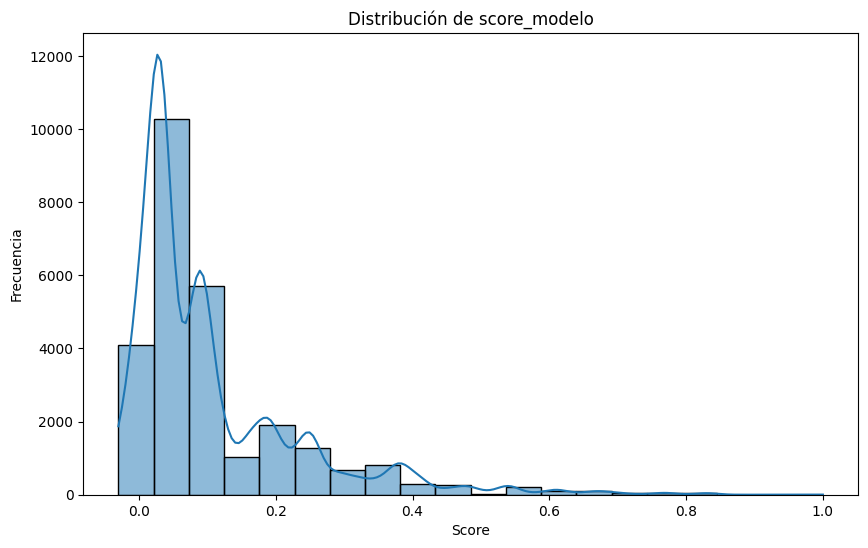

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de score_modelo
plt.figure(figsize=(10, 6))
sns.histplot(df_clients_executives_gerentes['score_modelo'], bins=20, kde=True)
plt.title('Distribución de score_modelo')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()


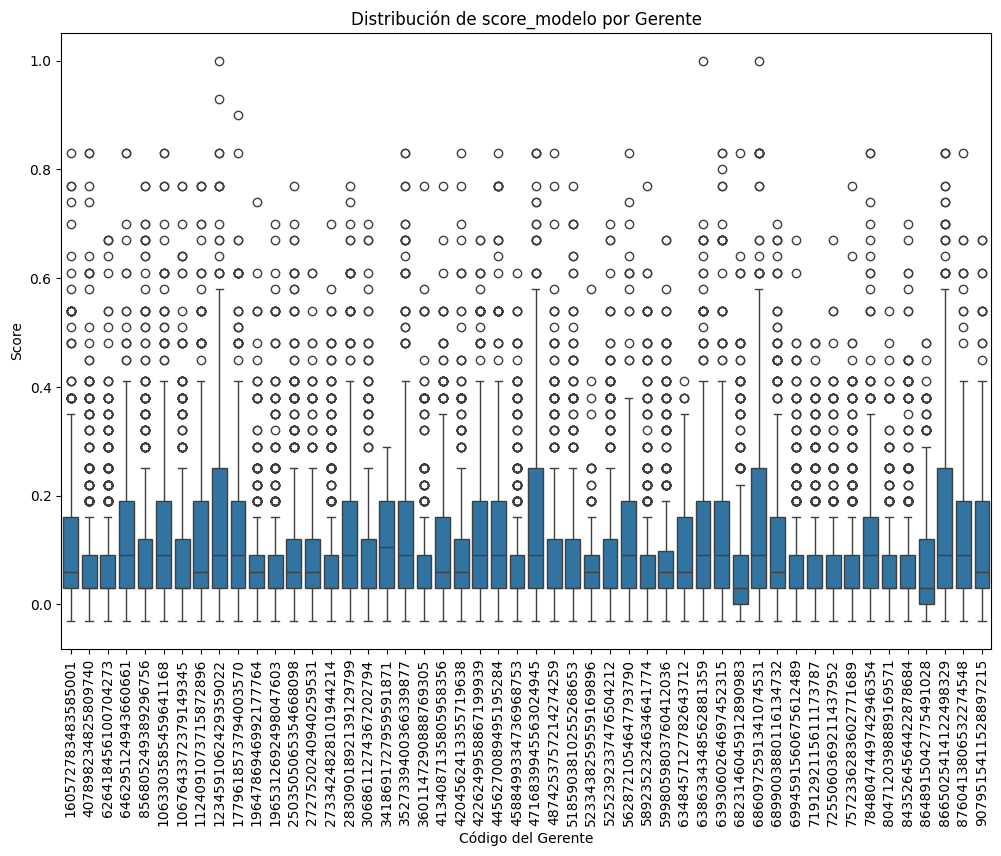

In [11]:
# Box Plot de score_modelo por cod_gte_inv
plt.figure(figsize=(12, 8))
sns.boxplot(x='cod_gte_inv', y='score_modelo', data=df_clients_executives_gerentes)
plt.title('Distribución de score_modelo por Gerente')
plt.xlabel('Código del Gerente')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()


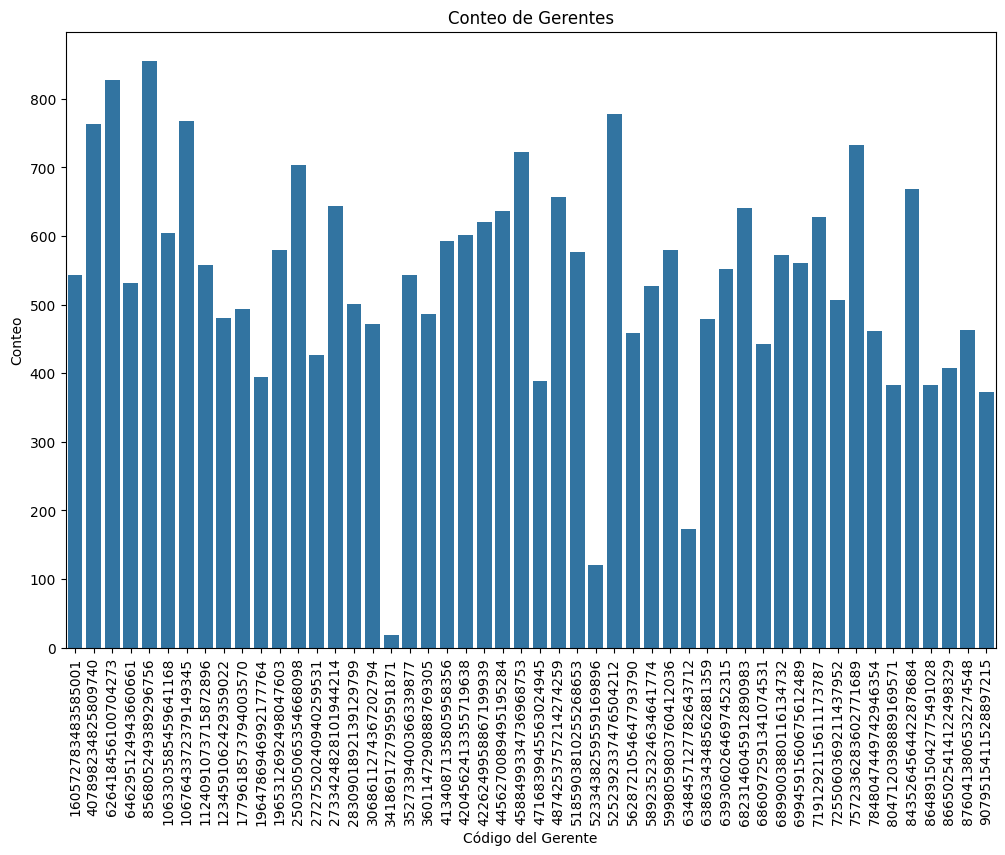

In [14]:
# Count Plot de cod_gte_inv
plt.figure(figsize=(12, 8))
sns.countplot(x='cod_gte_inv', data=df_clients_executives_gerentes)
plt.title('Conteo de Gerentes')
plt.xlabel('Código del Gerente')
plt.ylabel('Conteo')
plt.xticks(rotation=90)
plt.show()



Modelo de Optimización con PuLP

Elegí utilizar PuLP para resolver este problema porque me permite manejar todas las restricciones complejas de manera flexible y eficiente. Con PuLP, podemos garantizar que todos los gerentes y directores estén designados adecuadamente, maximizar la cantidad de clientes atendidos y priorizar a los clientes más valiosos. Además, es compatible con otras herramientas que utilizo, como Pandas.

In [17]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 32.5 MB/s eta 0:00:00


In [36]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

model = LpProblem(name="asignacion_clientes", sense=LpMaximize)

# Crear variables de decisión
decision_vars = {}
for i, row in df_clients_executives_gerentes.iterrows():
    var_name = f"x_{row['cod_ejec_bco']}_{row['num_doc_gte_inv_y']}"
    decision_vars[(row['cod_ejec_bco'], row['num_doc_gte_inv_y'])] = LpVariable(name=var_name, cat="Binary")

# Función objetivo: Maximizar el score_modelo total
model += lpSum(decision_vars[(row['cod_ejec_bco'], row['num_doc_gte_inv_y'])] * row['score_modelo']
               for _, row in df_clients_executives_gerentes.iterrows()), "Maximize Score"

# Restricciones: Cada ejecutivo solo puede estar asignado a un gerente
for cod_ejec_bco in df_clients_executives_gerentes['cod_ejec_bco'].unique():
    model += lpSum(decision_vars[(cod_ejec_bco, row['num_doc_gte_inv_y'])]
                   for _, row in df_clients_executives_gerentes[df_clients_executives_gerentes['cod_ejec_bco'] == cod_ejec_bco].iterrows()) == 1

# Restricciones: El tiempo disponible de cada gerente no puede ser superado
for num_doc_gte_inv in df_clients_executives_gerentes['num_doc_gte_inv_y'].unique():
    model += lpSum(decision_vars[(row['cod_ejec_bco'], num_doc_gte_inv)] * df_csv2.loc[df_csv2['codigo_de_vendedor'] == row['cod_ejec_bco'], 'total_promedio_tiempo_min_x_actividad'].sum()
                   for _, row in df_clients_executives_gerentes[df_clients_executives_gerentes['num_doc_gte_inv_y'] == num_doc_gte_inv].iterrows()) <= df_csv1.loc[df_csv1['cod_gte_inv'] == num_doc_gte_inv, 'tiempo_restante'].sum()



In [37]:
# Resolver el problema
status = model.solve()

# Verificar resultados
print(f"Status: {status}")

# Mostrar la mejor solución encontrada
for variable in model.variables():
    if variable.varValue > 0:
        print(f"{variable.name} = {variable.varValue}")

# Crear un DataFrame para los resultados
resultados = []

for (cod_ejec_bco, num_doc_gte_inv), var in decision_vars.items():
    if var.varValue == 1:
        clientes = df_clients_executives[df_clients_executives['cod_ejec_bco'] == cod_ejec_bco]['num_doc_cli'].tolist()
        for cliente in clientes:
            resultados.append({'num_doc_cli': cliente, 'cod_ejec_bco': cod_ejec_bco, 'num_doc_gte_inv': num_doc_gte_inv})

df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv('resultado_prueba.csv', index=False)

print("Asignación óptima completada y guardada en resultado_prueba.csv")


Status: -1
x_1038035979563217614_1978033980923414763 = 0.013888889
x_1047046168003998757_3322302553801625208 = 0.2
x_1064745979500609385_7745895991753920627 = 0.0061728395
x_106478656745057512_1886856872013727291 = 0.009009009
x_1076626390948855414_4548229588224812420 = 0.03030303
x_1099677258786509198_1976596424285295039 = 0.0096153846
x_1155375849062156698_4548229588224812420 = 0.025
x_1162922967993946182_3755649501228942515 = 0.018867925
x_1204242577871412148_3387807761749756262 = 0.011494253
x_1207151915313800644_1263041317332062711 = 0.016393443
x_1219772833821474060_8588671355042849336 = 0.019607843
x_1227230877085463625_7827484768931659151 = 0.0074074074
x_127252456218588665_1976596424285295039 = 0.010638298
x_1301563844748813218_6338595284312151840 = 0.016666667
x_1345715426513662161_4035831650893096308 = 0.0068965517
x_1396670477254067813_2438353989377984349 = 0.013888889
x_1411896424323490779_4344839043934969046 = 0.010752688
x_1459907217529076951_6522136206531577599 = 0.0156


Estado del problema de optimización: -1
Se observa un estado PuLP de -1 que normalmente indica que el problema de optimización no ha encontrado una solución factible. Esto significa que bajo las restricciones actuales y el modelo, el solucionador no puede encontrar una manera de asignar altos directivos a gerentes que satisfagan todas las restricciones. Esto puede deberse a que las restricciones impuestas son demasiado estrictas, es posible que no haya ninguna combinación de variables que satisfaga todas las condiciones al mismo tiempo.



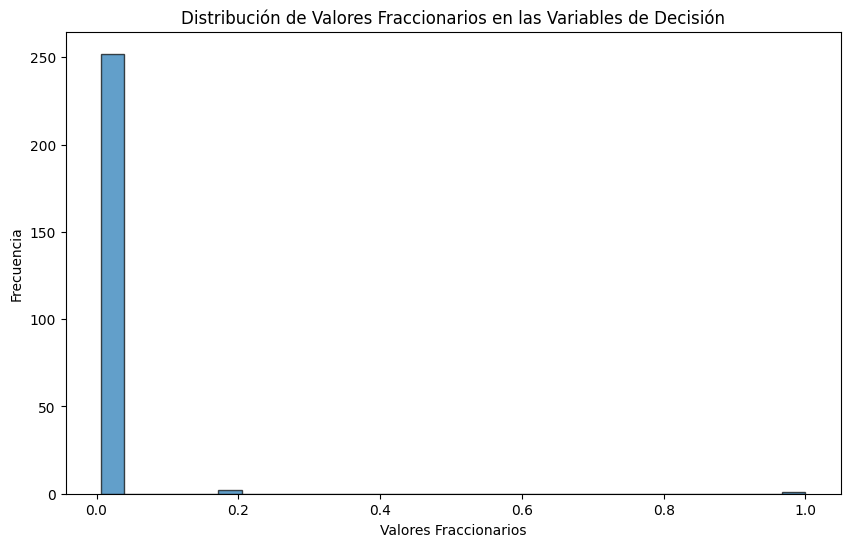

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que ya tienes los datos cargados en los DataFrames df_csv1, df_csv2, df_clients_executives_gerentes

# Histograma de valores fraccionarios en las variables de decisión
decision_vars = [0.013888889, 0.2, 0.0061728395, 0.009009009, 0.03030303, 0.0096153846, 0.025, 0.018867925, 0.011494253, 0.016393443, 0.019607843, 0.0074074074, 0.010638298, 0.016666667, 0.0068965517, 0.013888889, 0.010752688, 0.015625, 0.018867925, 0.0125, 0.024390244, 0.013513514, 0.011494253, 0.01010101, 0.010752688, 0.01754386, 0.018518519, 0.015625, 0.0094339623, 0.023255814, 0.010204082, 0.02173913, 0.015151515, 0.0071428571, 0.015625, 0.023255814, 0.0066225166, 0.0084745763, 0.012345679, 0.011235955, 0.010752688, 0.0089285714, 0.017241379, 0.032258065, 0.009009009, 0.0076335878, 0.016393443, 0.011627907, 0.016393443, 0.017857143, 0.012048193, 0.012195122, 0.0076335878, 0.0085470085, 0.0083333333, 0.015873016, 0.2, 0.025, 0.016666667, 0.011235955, 0.014285714, 1.0, 0.0081300813, 0.006993007, 0.015151515, 0.022222222, 0.017857143, 0.010309278, 0.011111111, 0.018181818, 0.017241379, 0.017857143, 0.010638298, 0.012195122, 0.0076335878, 0.0085470085, 0.015873016, 0.016949153, 0.014492754, 0.019230769, 0.01754386, 0.017857143, 0.026315789, 0.01, 0.02, 0.028571429, 0.018181818, 0.011494253, 0.013888889, 0.0070921986, 0.02, 0.01, 0.019230769, 0.011494253, 0.022222222, 0.0072992701, 0.02, 0.013888889, 0.016129032, 0.020408163, 0.022222222, 0.015873016, 0.014705882, 0.016393443, 0.010526316, 0.017241379, 0.0093457944, 0.025, 0.013157895, 0.017241379, 0.0076923077, 0.0074074074, 0.033333333, 0.022727273, 0.023809524, 0.03125, 0.024390244, 0.016393443, 0.022222222, 0.0096153846, 0.025, 0.013888889, 0.02, 0.02, 0.020833333, 0.011764706, 0.019607843, 0.023255814, 0.015873016, 0.0074074074, 0.022222222, 0.0074074074, 0.020408163, 0.015873016, 0.01754386, 0.011494253, 0.020408163, 0.028571429, 0.018181818, 0.014285714, 0.013888889, 0.012658228, 0.015873016, 0.015873016, 0.0098039216, 0.014084507, 0.015625, 0.019607843, 0.018518519, 0.017857143, 0.01754386, 0.015384615, 0.018181818, 0.01754386, 0.013333333, 0.019230769, 0.017241379, 0.02173913, 0.015151515, 0.014285714, 0.011494253, 0.017857143, 0.011494253, 0.015625, 0.01754386, 0.013157895, 0.016666667, 0.020408163, 0.025641026, 0.018518519, 0.018181818, 0.018867925, 0.020408163, 0.015873016, 0.017241379, 0.017857143, 0.01754386, 0.016949153, 0.020833333, 0.022222222, 0.022727273, 0.014285714, 0.021276596, 0.022222222, 0.015151515, 0.017857143, 0.014084507, 0.017857143, 0.015873016, 0.021276596, 0.018181818, 0.018518519, 0.022727273, 0.022222222, 0.014285714, 0.014285714, 0.018181818, 0.011494253, 0.018518519, 0.016949153, 0.020408163, 0.017857143, 0.015151515, 0.016949153, 0.025, 0.018518519, 0.020408163, 0.01754386, 0.015873016, 0.017241379, 0.017857143, 0.017857143, 0.018518519, 0.015873016, 0.015873016, 0.016949153, 0.014084507, 0.016129032, 0.017857143, 0.017241379, 0.017241379, 0.020408163, 0.015873016, 0.017857143, 0.014492754, 0.01754386, 0.018181818, 0.020833333, 0.018181818, 0.014285714, 0.018518519, 0.016129032, 0.015873016, 0.018181818, 0.017857143, 0.015873016, 0.018518519, 0.014285714, 0.017241379, 0.014084507, 0.020833333, 0.017241379, 0.017857143, 0.015873016, 0.018518519, 0.017857143, 0.017241379, 0.014084507, 0.017241379, 0.018181818, 0.016129032, 0.015873016, 0.014285714, 0.017241379, 0.017857143]
plt.figure(figsize=(10, 6))
plt.hist(decision_vars, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de Valores Fraccionarios en las Variables de Decisión')
plt.xlabel('Valores Fraccionarios')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
# Gráfico de barras de Restricciones vs Capacidad Disponible
# Calcular el tiempo total requerido por los clientes asignados para cada gerente
df_clients_executives_gerentes['total_tiempo_requerido'] = df_clients_executives_gerentes.apply(
    lambda row: df_csv2.loc[df_csv2['codigo_de_vendedor'] == row['cod_ejec_bco'], 'total_promedio_tiempo_min_x_actividad'].sum(),
    axis=1
)


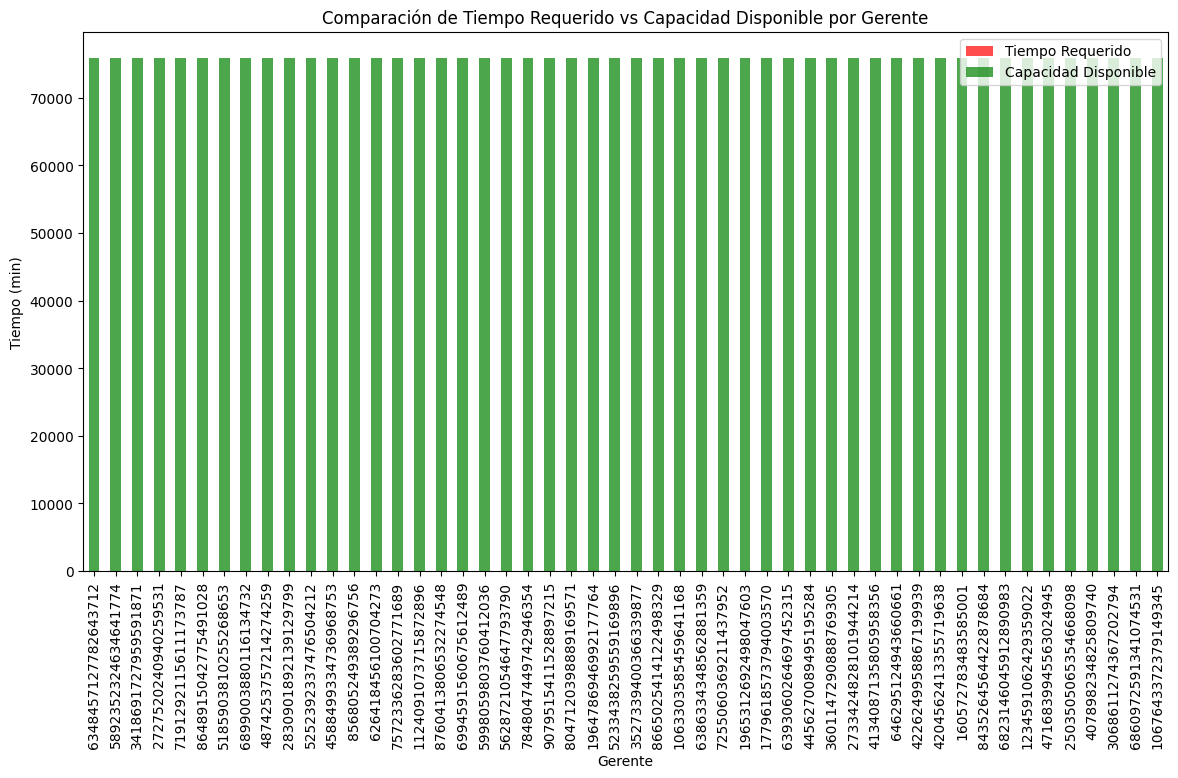

In [31]:
# Agrupar por gerente y sumar el tiempo requerido
tiempo_requerido_por_gerente = df_clients_executives_gerentes.groupby('cod_gte_inv')['total_tiempo_requerido'].sum()
capacidad_disponible_por_gerente = df_csv1.set_index('cod_gte_inv')['tiempo_restante']

# Crear el gráfico de barras
plt.figure(figsize=(14, 7))
tiempo_requerido_por_gerente.plot(kind='bar', color='red', alpha=0.7, label='Tiempo Requerido')
capacidad_disponible_por_gerente.plot(kind='bar', color='green', alpha=0.7, label='Capacidad Disponible')
plt.title('Comparación de Tiempo Requerido vs Capacidad Disponible por Gerente')
plt.xlabel('Gerente')
plt.ylabel('Tiempo (min)')
plt.legend()
plt.show()

El gráfico respalda la hipótesis de que el problema no tiene una solución factible con las restricciones actuales. La uniformidad de la capacidad disponible y la falta de tiempo requerido significativo indican que el modelo no está logrando asignar tiempos de manera efectiva entre los gerentes y ejecutivos.

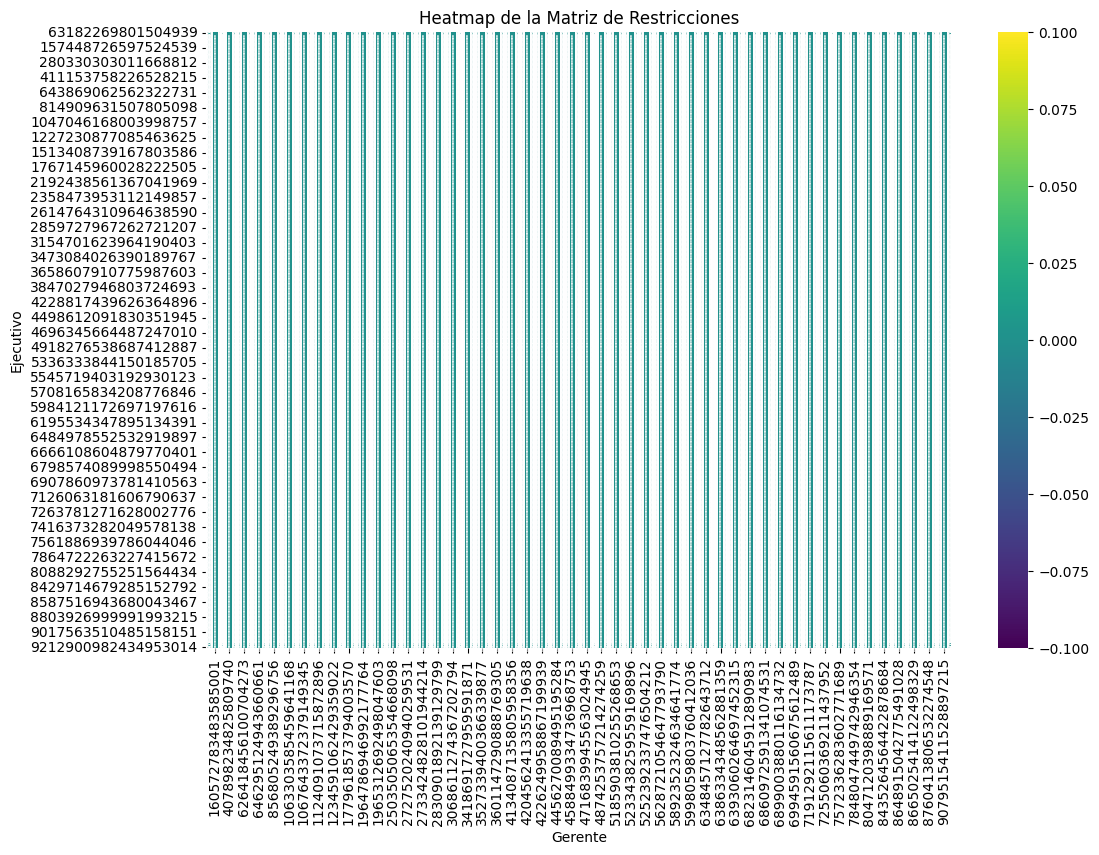

In [32]:
# Heatmap de la Matriz de Restricciones
# Crear una matriz de restricciones
restricciones = pd.pivot_table(df_clients_executives_gerentes, values='total_tiempo_requerido', index='cod_ejec_bco', columns='cod_gte_inv', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(restricciones, cmap='viridis', annot=True, fmt=".1f")
plt.title('Heatmap de la Matriz de Restricciones')
plt.xlabel('Gerente')
plt.ylabel('Ejecutivo')
plt.show()

Puedo ver que los valores de la matriz de límites son muy uniformes y en la mayoría de los casos cercanos a cero, lo que indica que la distribución del tiempo entre gerentes y supervisores está muy dispersa y sin una distribución significativa. Además, la ausencia de valores altos sugiere que no hay una asignación de tiempo significativa entre la mayoría de los gerentes y directores, lo que puede ser una indicación de que el modelo no puede encontrar soluciones que funcionen bajo las limitaciones actuales. La distribución uniforme de las restricciones refuerza esta idea, ya que parece que las restricciones impuestas son demasiado estrictas y no permiten una focalización significativa. En resumen, se puede afirmar que el mapa de calor apoya la hipótesis de que no existe una solución viable al problema dados las restricciones actuales.